<a href="https://colab.research.google.com/github/yashasvi2601/Agglometric_clustering/blob/main/Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative Hierarchical Clustering
This notebook demonstrates the implementation of Agglomerative Hierarchical Clustering on a non-image dataset.
## Steps
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform Agglomerative Hierarchical Clustering
4. Visualize the results
5. Analyze the results

In [9]:

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [10]:

# Loading the Iris dataset
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

# Data preprocessing: scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Display scaled data
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

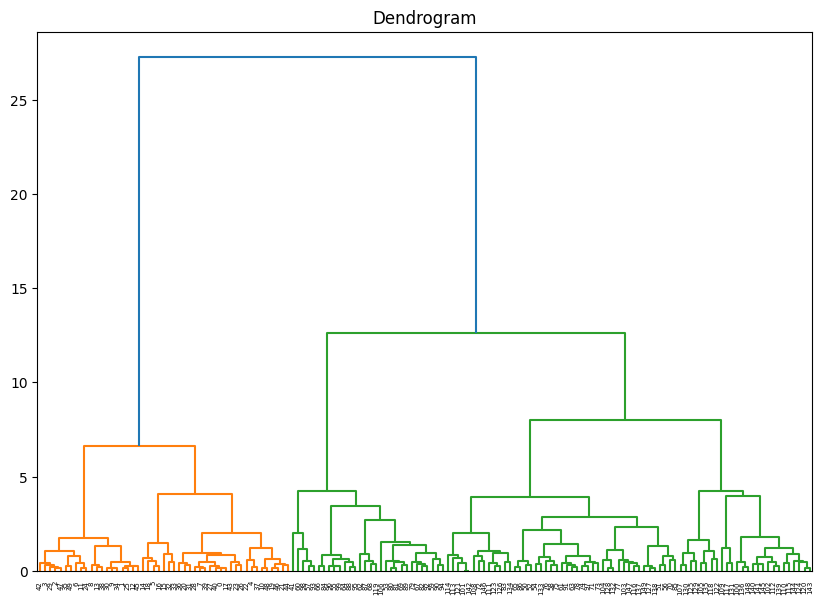

In [ ]:

# Generating a dendrogram to visualize the hierarchical structure
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()


In [ ]:

from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
labels = clustering.fit_predict(X_scaled)

# Adding cluster labels to the original dataframe
df['Cluster'] = labels

# Display the updated dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


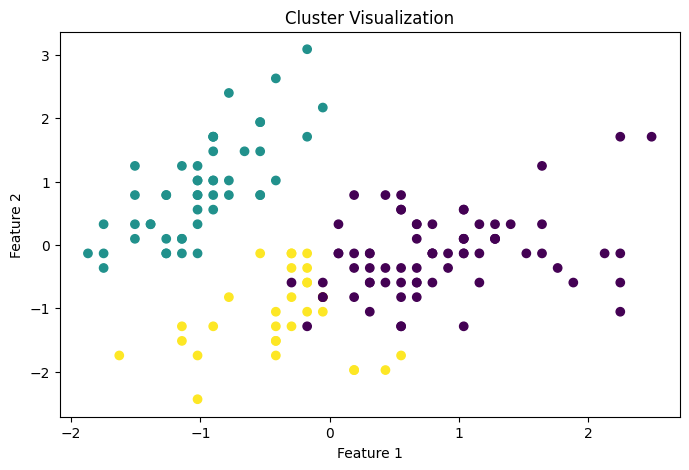

In [ ]:

# Visualizing the clusters in a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
